# Handwritten Digit Recognition Project

## Introduction
The Handwritten Digit Recognition project aims to accurately identify and classify handwritten digits, a challenge that is crucial for various applications such as automated data entry and postal services. The variability in handwriting styles can significantly impact recognition accuracy. This project utilizes the MNIST dataset, which contains a vast collection of handwritten digits, to develop a robust neural network model using TensorFlow and Keras.

## Problem Statement
Accurately recognizing handwritten digits is essential for many automated systems. The variability in handwriting styles creates a significant challenge for traditional recognition methods, leading to decreased accuracy. By leveraging the MNIST dataset, this project seeks to develop a neural network that can effectively learn to distinguish between different handwritten digits, improving its ability to generalize and make accurate predictions on unseen data.

## Proposed Solution
The proposed solution involves developing a Convolutional Neural Network (CNN) model that leverages TensorFlow and Keras for digit classification. The solution will consist of several key components:

## Step 1: **Set Up Your Environment**
Install Required Libraries Make sure you have Python and the necessary libraries installed.

In [1]:
pip install tensorflow numpy matplotlib

   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
    --------------------------------------- 10.2/413.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/413.4 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 92.2/413.4 kB 655.4 kB/s eta 0:00:01
   ---------------------------------------  409.6/413.4 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 413.4/413.4 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.2
    Uninstalling protobuf-5.28.2:
      Successfully uninstalled protobuf-5.28.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.66.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.5 which is incompatible.


## Step 2: **Import Libraries**
Start your Python script or Jupyter Notebook by importing the required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Step 3: **Load the MNIST Dataset**
The MNIST dataset is included in Keras, making it easy to load.

In [3]:
# Load the dataset
mnist = keras.datasets.mnist

# Split into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Step 4: **Preprocess the Data**
Normalize the pixel values to be between 0 and 1 and reshape the input data for the CNN.

In [4]:
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to add channel dimension (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Check the shape
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

Train shape: (60000, 28, 28, 1), Test shape: (10000, 28, 28, 1)


## Step 5: **Define the CNN Model**
Create a Convolutional Neural Network model.

In [5]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 6: **Compile the Model**
Compile the model with an optimizer, loss function, and evaluation metric.

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 7: **Train the Model**
Train the model using the training data.

In [7]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9046 - loss: 0.3278 - val_accuracy: 0.9808 - val_loss: 0.0684
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9858 - loss: 0.0477 - val_accuracy: 0.9836 - val_loss: 0.0490
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9905 - loss: 0.0312 - val_accuracy: 0.9883 - val_loss: 0.0379
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9924 - loss: 0.0226 - val_accuracy: 0.9895 - val_loss: 0.0387
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9949 - loss: 0.0151 - val_accuracy: 0.9880 - val_loss: 0.0438
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9953 - loss: 0.0130 - val_accuracy: 0.9864 - val_loss: 0.0489
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.9906 - val_loss: 0.0371
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9974 -

## Step 8: **Evaluate the Model**
Evaluate the model’s performance on the test dataset.

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 2s - 7ms/step - accuracy: 0.9883 - loss: 0.0488
Test accuracy: 0.9883000254631042


## Step 9:**Make Predictions**
Use the model to make predictions on new data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


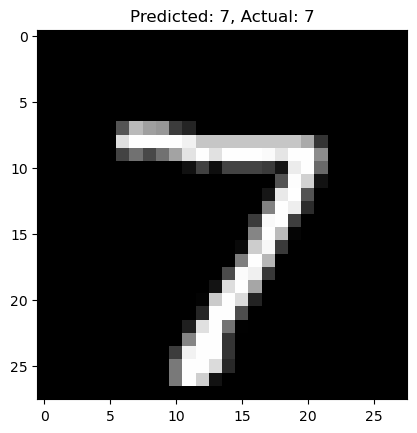

In [9]:
predictions = model.predict(x_test)

# Display a sample prediction
index = 0  # Change this index to see different predictions
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.show()

In [10]:
model.save('handwritten_digit_recognition_model.h5')

## Alternatives Considered
Several alternative approaches were considered in the development of the Handwritten Digit Recognition project:

- **Traditional Machine Learning Algorithms**: Algorithms such as Support Vector Machines (SVM) and k-Nearest Neighbors (k-NN) were considered for digit classification. While these methods can be effective for smaller datasets, they often struggle to generalize well with the complexity and variability inherent in handwritten digits compared to deep learning approaches.

## Conclusion
The implementation of a CNN for handwritten digit recognition showcases the effectiveness of deep learning in image classification. The structured approach taken in this project not only demonstrates the ability to automate digit recognition but also emphasizes the practical applications of neural networks in various industries.